In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from scipy import stats

In [2]:
%store -r preprocessed_data_df

<h3>Explonatory Data Analysis</h3>

Lets answer few questions about the dataset by performing explonatory data analysis.

1. Which year has the highest number of loans issued?
2. Which year with most charged off loans ?
3. Which grade loans are charged off the most ?
4. Loans across different states in United States?
5. What is the minimum fico score to get a loan from Lending Tree?
6. Which loan purpose has the highest number of charged off loans ?
7. Which homeownership status has the highest number of charged off loans

<h4>Which year has the highest number of charged off loans?</h4>

In [3]:
filtered_loans_df = preprocessed_data_df.copy(deep=True)

The issue_d is in the format Mon-yyyy. Split the issue_d into issue_year and issue_month

In [5]:
filtered_loans_df['issue_year'] = pd.DatetimeIndex(filtered_loans_df['issue_d']).year
filtered_loans_df['issue_month'] = pd.DatetimeIndex(filtered_loans_df['issue_d']).month
filtered_loans_df.drop(['issue_d'],axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,issue_year,issue_month
0,5000.0,5000.0,4975.000000,162.87,24000.00,27.65,0.0,735.0,739.0,1.0,...,83.7%,f,Jan-2015,Dec-2017,Individual,N,Cash,N,2011,12
1,2500.0,2500.0,2500.000000,59.83,30000.00,1.00,0.0,740.0,744.0,5.0,...,9.4%,f,Apr-2013,Oct-2016,Individual,N,Cash,N,2011,12
2,2400.0,2400.0,2400.000000,84.33,12252.00,8.72,0.0,735.0,739.0,2.0,...,98.5%,f,Jun-2014,Jun-2017,Individual,N,Cash,N,2011,12
3,10000.0,10000.0,10000.000000,339.31,49200.00,20.00,0.0,690.0,694.0,1.0,...,21%,f,Jan-2015,Apr-2016,Individual,N,Cash,N,2011,12
4,3000.0,3000.0,3000.000000,67.79,80000.00,17.94,0.0,695.0,699.0,0.0,...,53.9%,f,Jan-2017,Jan-2017,Individual,N,Cash,N,2011,12
5,5000.0,5000.0,5000.000000,156.46,36000.00,11.20,0.0,730.0,734.0,3.0,...,28.3%,f,Jan-2015,Feb-2017,Individual,N,Cash,N,2011,12
6,7000.0,7000.0,7000.000000,170.08,47004.00,23.51,0.0,690.0,694.0,1.0,...,85.6%,f,May-2016,Sep-2016,Individual,N,Cash,N,2011,12
7,3000.0,3000.0,3000.000000,109.43,48000.00,5.35,0.0,660.0,664.0,2.0,...,87.5%,f,Jan-2015,Dec-2014,Individual,N,Cash,N,2011,12
8,5600.0,5600.0,5600.000000,152.39,40000.00,5.55,0.0,675.0,679.0,2.0,...,32.6%,f,Apr-2012,Oct-2016,Individual,N,Cash,N,2011,12
9,5375.0,5375.0,5350.000000,121.45,15000.00,18.08,0.0,725.0,729.0,0.0,...,36.5%,f,Nov-2012,Dec-2016,Individual,N,Cash,N,2011,12


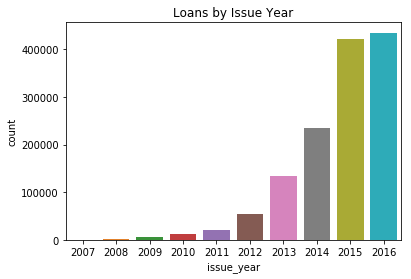

In [22]:
g = sns.countplot(x="issue_year", data=filtered_loans_df)
g.set_title(label="Loans by Issue Year")

<h4>Lets plot time series plot</h4>

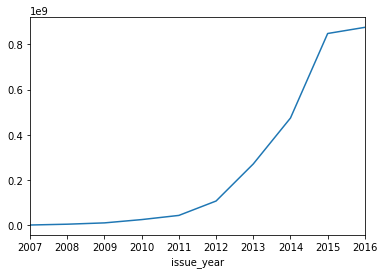

In [23]:
filtered_loans_df.groupby(['issue_year'])['issue_year'].sum().plot()

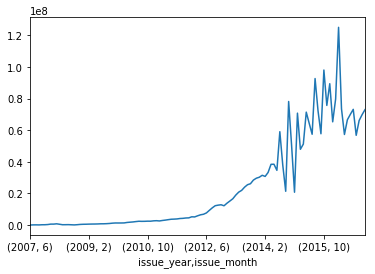

In [24]:
filtered_loans_df.groupby(['issue_year','issue_month'])['issue_year'].sum().plot()

Number of Loans issued by Lending Tree have increased from 2007 to 2016. The highest number of loans are issued in the year 2015 and 2016.The number of loans are alomst doubled in the year 2015 and 2016 in comparsion to the loans in 2013 and 2014.

<h4> Different Loan statuses </h4>

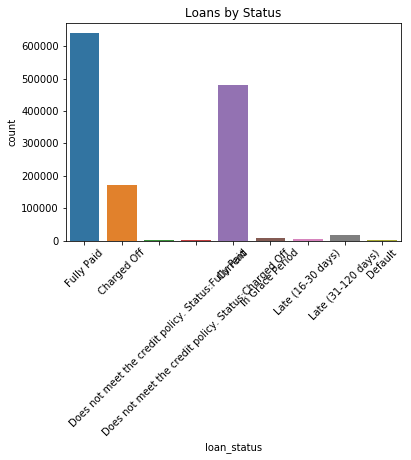

In [25]:
#Lets see the number of loans by loan_status
g = sns.countplot(x="loan_status", data=filtered_loans_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(label="Loans by Status")

From the above graph we can see the maxium numbers of loans have been fully paid loan status.The charged off loans are pretty significant. Also, there are quite number of loans which are current.

In [6]:
#Filter the loans with staus "Fully Paid" and "Charged Off"
filtered_loans_df = filtered_loans_df[(filtered_loans_df["loan_status"] == "Fully Paid") |
                            (filtered_loans_df["loan_status"] == "Charged Off")]

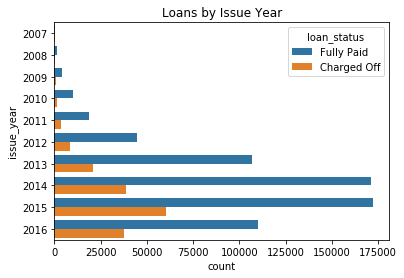

In [27]:
g=sns.countplot(y="issue_year", hue="loan_status", data=filtered_loans_df);
g.set_title(label="Loans by Issue Year")

Anlaysis from the above graph
1. Number of maximum charged off loans are in the year 2015.
2. Number of maxmium fully paid loans are in the year 2014 and 2015
3. The number of loans in 2016 are less compared to 2014 and 2015. The reason may be, the loans are in "current" loan status.

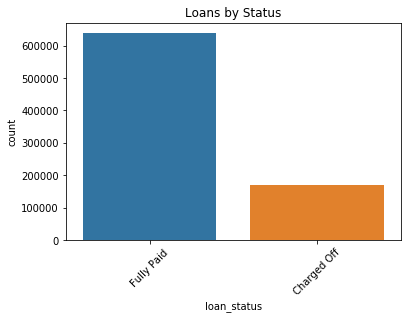

In [28]:
g = sns.countplot(x="loan_status", data=filtered_loans_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(label="Loans by Status")

There are total of 8000000 loans which have either fully paid or chanrged off status.From the graph it looks that the ratio of fully paid and charged off loans is 3:1. i.e almost 200000 loans are charged off from 2007 to 2016.

<h4>Which grade loans are charged off the most</h4>

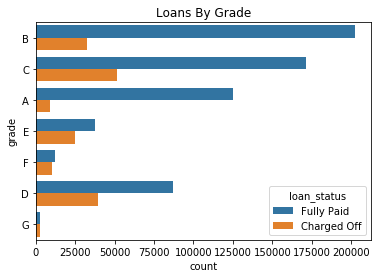

In [29]:
#plot the grpah between loan status and grade
g = sns.countplot(y="grade", hue="loan_status", data=filtered_loans_df);
g.set_title(label="Loans By Grade")

1. The maximum charged off loans are of grade C loans.
2. Even the loan with good grades like A and B have significant charged off loans.
3. Number of loans issued for F and G are very less but more than half the loans are charged off.

From the above graphs we noticed that there are significant loans that are chnarged off are issued in the year 2014,2015,2016. Lets see how different grade loans are charged off for the loasn issued in the years 2014,2015 and 2016.

In [30]:
filtered_loans_2014_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2014)]
filtered_loans_2015_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2015)]
filtered_loans_2016_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2016)]

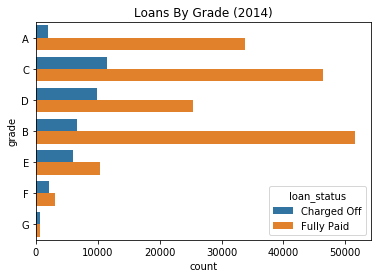

In [31]:
g = sns.countplot(y="grade", hue="loan_status", data=filtered_loans_2014_df);
g.set_title(label="Loans By Grade (2014)")

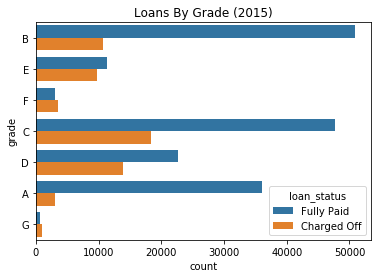

In [32]:
g = sns.countplot(y="grade", hue="loan_status", data=filtered_loans_2015_df);
g.set_title(label="Loans By Grade (2015)")

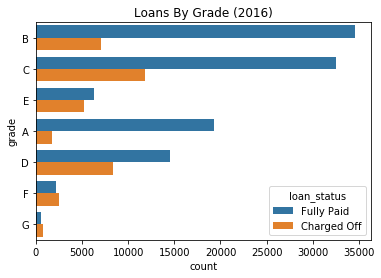

In [33]:
g = sns.countplot(y="grade", hue="loan_status", data=filtered_loans_2016_df);
g.set_title(label="Loans By Grade (2016)")

<p>It is evident from the above graphs that loans from grade C are charged off the most.Also the loans with grade B and D have significant charged off rate</p>

<h4>Loans across different states in United States</h4>

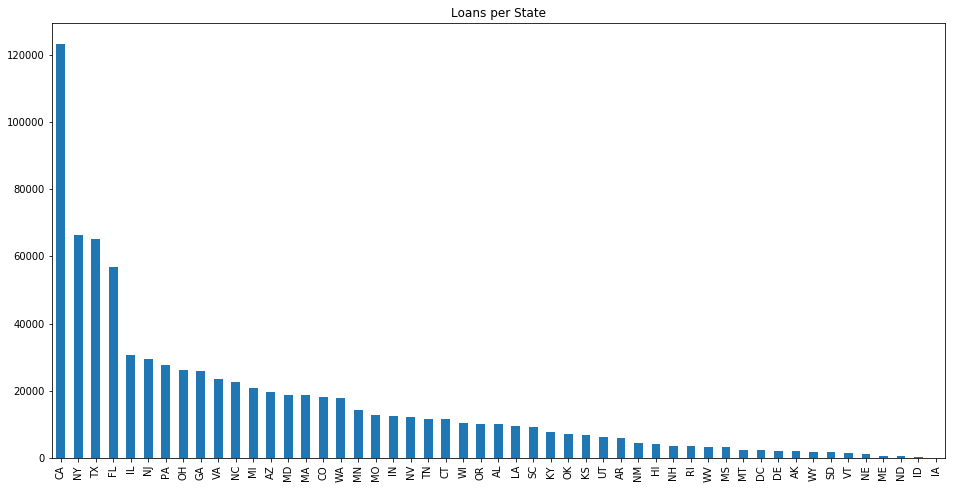

In [34]:
#plot the number of loans per state
state_count = filtered_loans_df.addr_state.value_counts()

state_count.plot(kind = 'bar',figsize=(16,8), title = 'Loans per State')

Lending Tree approves loans in most of the states in United states. The maximum number of loans are issued in California , Newyork, Texas and Florida. The lease number of loans are issed in the states Maine,North Dakota, Idaho and Iowa.

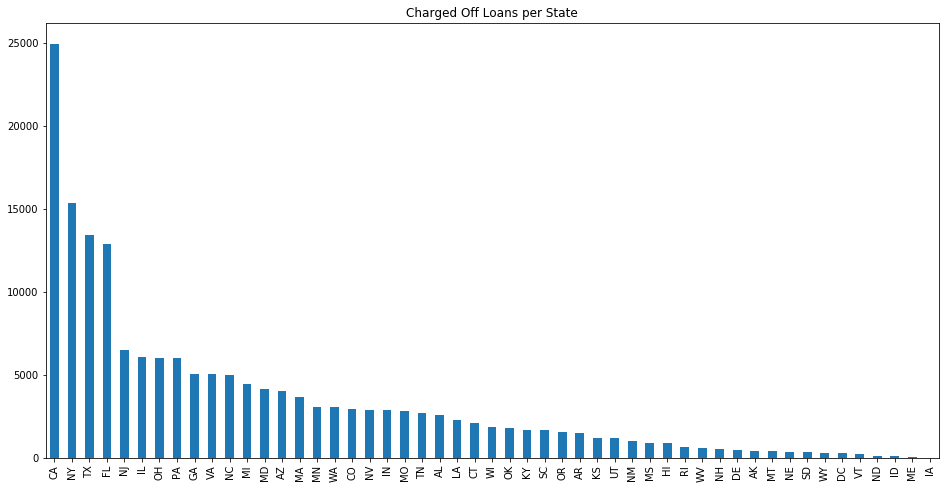

In [35]:
#plot the number of charged loans per state
state_count = filtered_loans_df[filtered_loans_df.loan_status == 'Charged Off'].addr_state.value_counts()

state_count.plot(kind = 'bar',figsize=(16,8), title = 'Charged Off Loans per State')

<p>California has the highest number of charged off loans where as Idaho state has least number of charged off loans <p>The number of charged off loans are in proportion with the number of loans issued in the respective states.More the loans issued more the loans that are charged off

<h4>What is the minimum fico score to get a loan from Lending Tree? </h4>

In [9]:
filtered_loans_df['fico_average'] = (filtered_loans_df['fico_range_high'] + filtered_loans_df['fico_range_low']) / 2

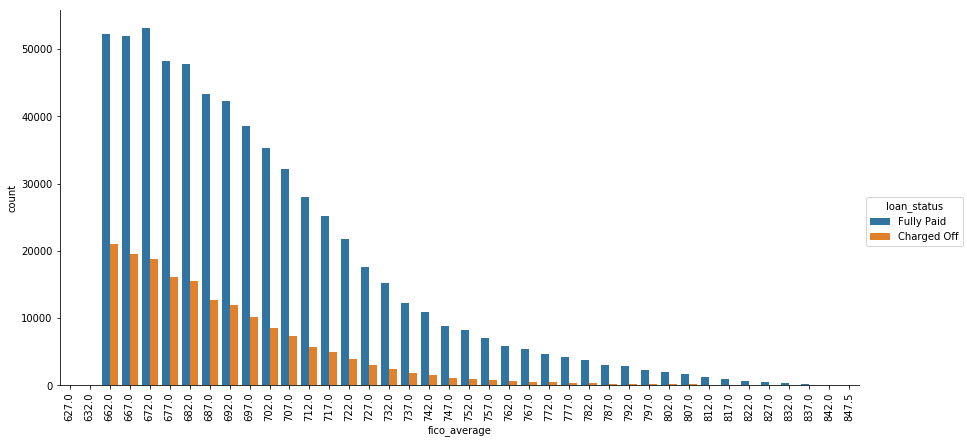

In [37]:
g = sns.factorplot(x='fico_average', data=filtered_loans_df, 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Loans by Fico Score")

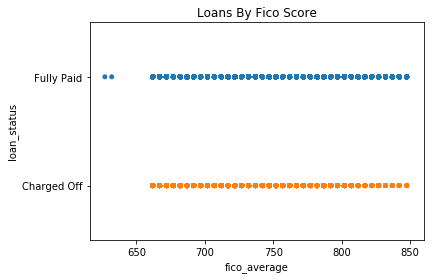

In [39]:
g = sns.stripplot(x="fico_average", y="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Fico Score")


Analysis:

1. The minimum fico score is atleast 650 to get a loan from LendingTree
2. Higher the fico score the lesser the charged off loans.
3. It is evident that the loans with low fico score charged off the most.
4. The loans with high fico score also have charged off status. so there may be other features that are causing the loans to charge off.

<h4>Which loan purpose has the highest number of charged off loans ?</h4>

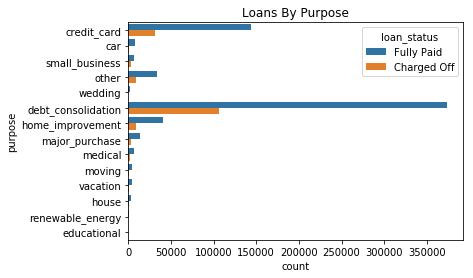

In [40]:
#Plot the graph for loans by purpose
g = sns.countplot(y="purpose", hue="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Purpose")

The above graph shows that the loans with purpose "Debt consolidation" and "credit card" have highest charged off rate.

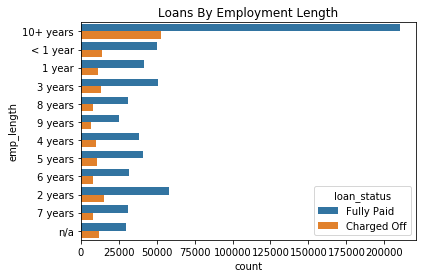

In [41]:
g = sns.countplot(y="emp_length", hue="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Employment Length")

Applicants who have employment length >10 years have the most loans issued and charged off rate. But the rest of the employment lengths(1 -9) have almost same charge off rate.

<h4>Which homeownership status has the highest number of charged off loans</h4>

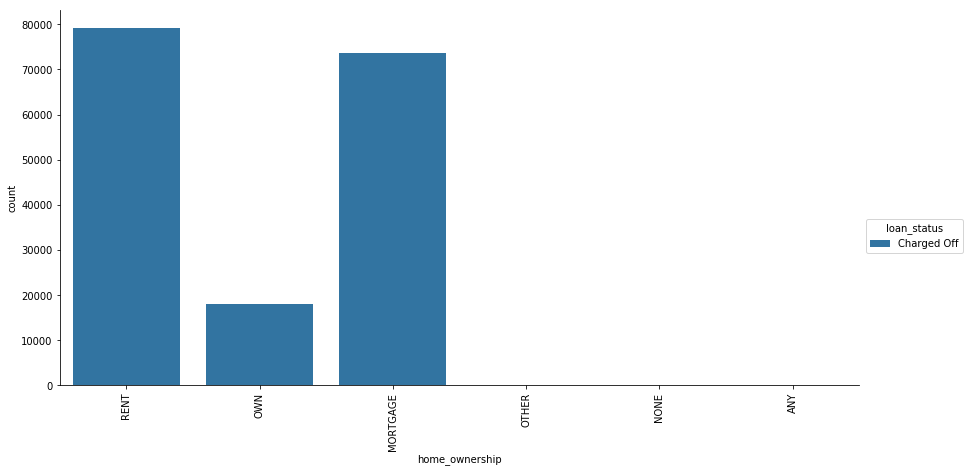

In [42]:
g = sns.factorplot(x='home_ownership', data=filtered_loans_df[filtered_loans_df["loan_status"] == "Charged Off"], 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Charged off by home ownership")
plt.show()

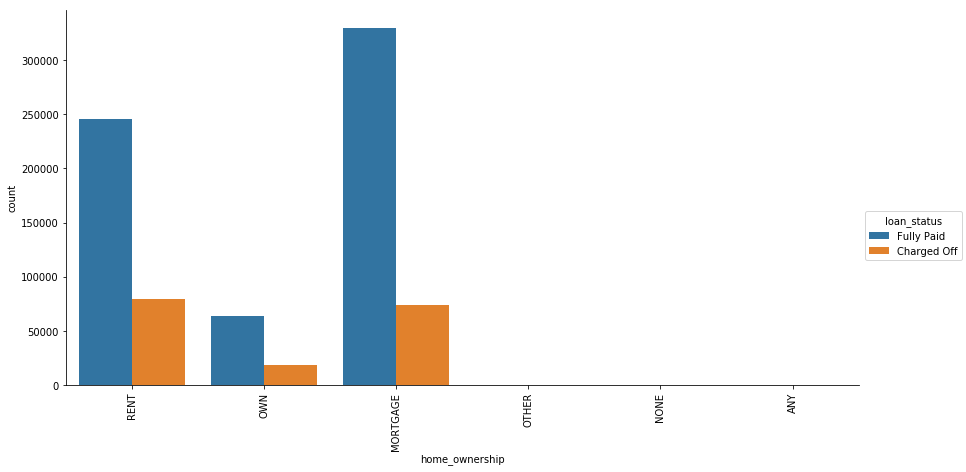

In [43]:
g = sns.factorplot(x='home_ownership', data=filtered_loans_df, 
                   hue='loan_status',
                   kind='count',size=6, aspect=2)
g.set_xticklabels(rotation=90)
g.set_titles("Counting Loans by home ownership")
plt.show()

- The applicants who have mortagage have been issued the most loans.
- The charged off rate for the loans with home owenership rent are slightly less than the loans with mortgage

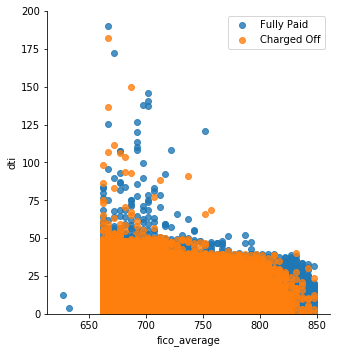

In [45]:
# Use the 'hue' argument to provide a factor variable
g = sns.lmplot( x="fico_average", y="dti", data=filtered_loans_df, fit_reg=False, hue='loan_status', legend=False)
g.set(ylim=(0, 200))
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
#sns.plt.show()

1. Fico score and dti (debt to income ratio) are negatively correlated
2. Lesser the fico score the higher the dti

In [7]:
filtered_loans_df['int_rate'] = filtered_loans_df['int_rate'].replace('%','',regex=True).astype('float')
filtered_loans_df['term'] = filtered_loans_df['term'].replace('months','',regex=True).astype('int')


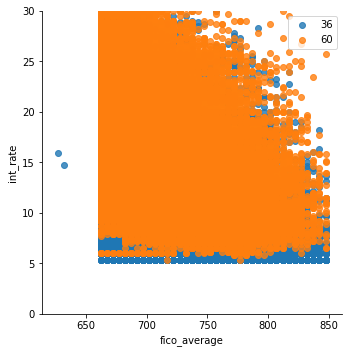

In [10]:
g = sns.lmplot( x="fico_average", y="int_rate", data=filtered_loans_df, fit_reg=False, hue='term', legend=False)
g.set(ylim=(0, 30))
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

Analysis :
1. Fico score and interet rate are negatively correlated
2. Lesser the fico score the higher the interest rate
3. The applicants with higher fico have mostly opted for 36 loan term


<h3>Inferential Statistics</h3>

<h3>Lets answer few questions :</h3>
<h4>1.Is there any significant change in the interest rate for the year 2015 and 2016 for grade E loans ? </h4>

In [11]:
#Filter Data for the year 2015
filtered_loans_2015_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2015) ]

#Filter Data for the year 2016
filtered_loans_2016_df = filtered_loans_df[(filtered_loans_df["issue_year"] == 2016) ]

Lets plot the graphs for the year 2015 and 2016

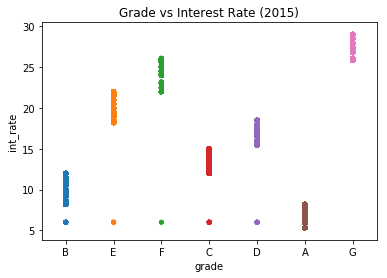

In [12]:
g = sns.stripplot(x="grade", y="int_rate", data=filtered_loans_2015_df);
g.set_title("Grade vs Interest Rate (2015)")

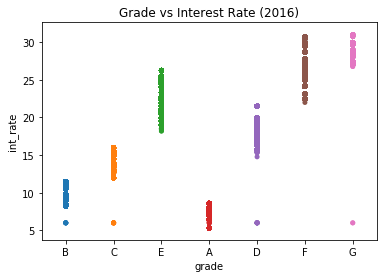

In [13]:
g = sns.stripplot(x="grade", y="int_rate", data=filtered_loans_2016_df);
g.set_title("Grade vs Interest Rate (2016)")

From the above graphs ,we can see that there is a difference in the range of interest rates for the years 2015 and 2016 epecially. The loans with grades D,E,F,G have the high risk to default and thats why the interest rates are so high. The increare in the interest rates for the year 2016 may be due to the increase in the charged off rate in the year 2015. The loans with grades c & D have the highest number of charged off rate in 2015.

Lets see if there is a significanct difference interest rates for the year 2015 and 2016

<p>Null Hypothesis : There is no difference in the interest rates for grade E loans in 2015 and 2016.</p>
<p>Alternate Hypothesis : There is diffen=rence in the interest rates for grade E loans in 2015 and 2016.</p>

In [16]:
#interest rates for grade E loans for the year 2015
int_rate_2015 = filtered_loans_df[(filtered_loans_df.grade=="E") & (filtered_loans_df.issue_year==2015) ]['int_rate']
#interest rates for grade E loans for the year 2016
int_rate_2016 = filtered_loans_df[(filtered_loans_df.grade=="E") & (filtered_loans_df.issue_year==2016) ]['int_rate']

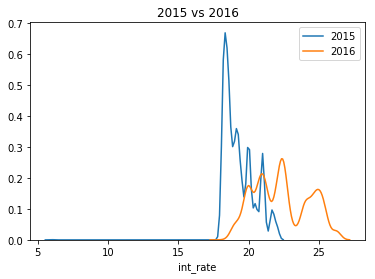

In [17]:
sns.distplot(int_rate_2015,hist=False,label='2015')
sns.distplot(int_rate_2016,hist=False,label='2016')
plt.title('2015 vs 2016')

In [18]:
#Difference in the means
print("Difference in the interest rates:", int_rate_2015.mean() - int_rate_2016.mean())

#t-test
stats.ttest_ind(int_rate_2015, int_rate_2016)

Difference in the interest rates: -2.98085786549305


Ttest_indResult(statistic=-179.11915103758525, pvalue=0.0)

p-value < 0.05 , so we can reject the null hypothesis in favor to alternate hypothesis. so there is a significant difference in the intereset rates for the years 2015 and 2016 for grade E loans. There is an increase of 2.98 interest rate for grade E loans.

<h4> 2. Does loan purpose has the significant impact on the charged off rate?</h4>

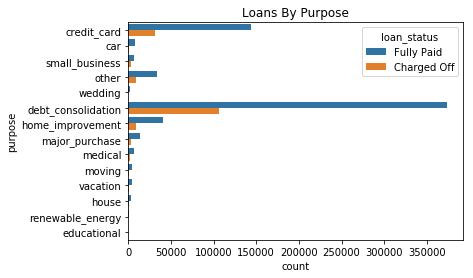

In [19]:
#Plot the graph for loans by purpose
g = sns.countplot(y="purpose", hue="loan_status", data=filtered_loans_df);
g.set_title( "Loans By Purpose")

From the above , we can see that the loans with debt consolidation as purpose have highest number of loans issued and charged off loans as well.It is eveident from the graph that there is relationship between the purpose and loan status.Lets use statistical test to prove it.


<h4>What are null and alternate hypothesis ? </h4>

H0: Null Hypothesis : Loans Purpose has no significant assoication with the loan status

HA: Loans Purpose has no significant assoication with the loan status

<h4>Which statistical test to be used ? </h4>


The chi-square test of independence is a statistical test used to determine whether two categorical variables are independent of each other or not.The Chi-Square test of independence can be performed using the chi2_contingency function in the SciPy package

In [20]:
from scipy.stats import chi2_contingency
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    print(ctsum)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
print(chisq_of_df_cols(filtered_loans_df, 'loan_status' , 'purpose'))

loan_status         Charged Off  Fully Paid
purpose                                    
car                        1320        7386
credit_card               31914      143734
debt_consolidation       106717      373614
educational                  56         270
home_improvement           9312       40252
house                       895        3015
major_purchase             3222       13809
medical                    2004        6486
moving                     1383        4163
other                      9567       33185
renewable_energy            150         445
small_business             3103        7024
vacation                   1007        3871
wedding                     277        1996
(2461.2539968957035, 0.0, 13, array([[  1.83674736e+03,   6.86925264e+03],
       [  3.70573167e+04,   1.38590683e+05],
       [  1.01337778e+05,   3.78993222e+05],
       [  6.87778127e+01,   2.57222187e+02],
       [  1.04567592e+04,   3.91072408e+04],
       [  8.24911803e+02,   3.08508820e+0

The first value is chi-square value

The second value is p-value

The third value is degree of freedom

The fourth one is array of expected frequencies, based on the marginal sums of the table.

The p-value is 0.0 , so we reject the null hypotheis in the favor of alternate hypothesis. So there is a statistical significant association beteween loan purpose and the loan status.